# PCA in Numpy

The goal of this is for educational purposes only. This project implements PCA in just native Python and Numpy. The only other packages used are for visualization. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### The major steps in doing principal component analysis include the following. 
1. Standardization -  Mean of 0, variance of 1. 
2. Compute Covariance Matrix:
3. Compute Eigenvectors and Eigenvalues
4. Select Principal Components: 
5. Projection. 


In [ ]:
# Data comes in the form of a matrix. Each row is a sample, each column is a feature
data = [[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8], [5, 6, 7, 8, 9]]

### Standardization theory
To make it easier to visualize, we will use 2D array. 

In [63]:
d = np.random.randint(1, 10, (10, 2))
# Here each row is a feature and each column is a sample. 
d

array([[1, 5],
       [3, 7],
       [5, 4],
       [5, 4],
       [6, 8],
       [2, 7],
       [3, 4],
       [7, 5],
       [3, 7],
       [3, 2]])

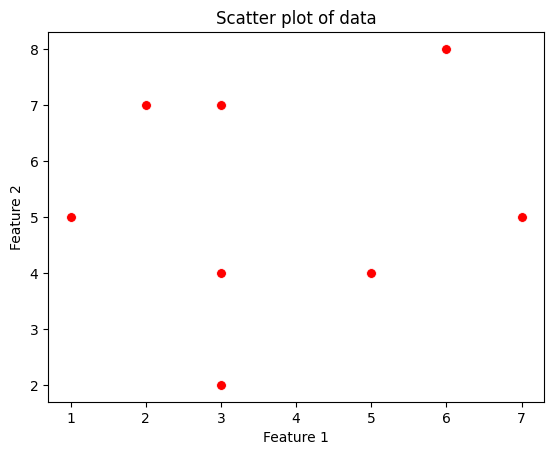

In [67]:
sns.scatterplot(x=d[:,0], y=d[:,1], color="red", marker="o",  s=50)
plt.title('Scatter plot of data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

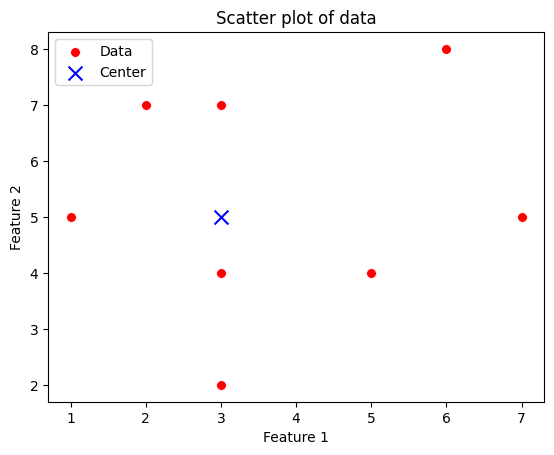

In [68]:
# The center of the plot. 
center_ = np.mean(d, axis=1)
sns.scatterplot(x=d[:,0], y=d[:,1], color="red", marker="o",  s=50, label="Data")
plt.scatter(center_[0], center_[1], color="blue", marker="x", s=100, label="Center")
plt.title('Scatter plot of data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [72]:
# Center and normalize 
center = d - np.mean(d, axis=0)
normalized  = center / np.std(d, axis=0)

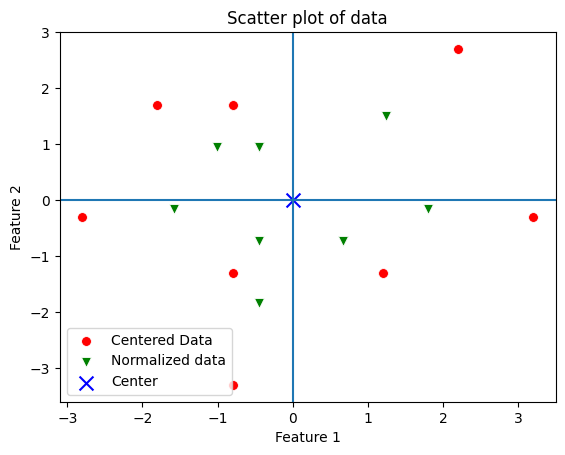

In [75]:
# The center of the plot. 
center_ = np.zeros(2)
sns.scatterplot(x=center[:,0], y=center[:,1], color="red", marker="o",  s=50, label="Centered Data")
sns.scatterplot(x=normalized[:,0], y=normalized[:,1], color="green", marker="v",  s=50, label="Normalized data")
plt.axhline( y=0)
plt.axvline( x=0)
plt.scatter(center_[0], center_[1], color="blue", marker="x", s=100, label="Center")
plt.title('Scatter plot of data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Since it is a linear transformation, the positions of these are all the same relative to each other.. 

In [77]:
# Proof. 
print(np.std(normalized))

1.0


In [79]:
def standardize(data: np.ndarray) -> np.ndarray:
    assert isinstance(data, np.ndarray), "Data must be a numpy array"
    center = data - np.mean(data, axis=0)
    normalized = center / np.std(data, axis=0)
    return normalized


In [85]:
data = np.round(np.random.randn(20, 5) * 10).astype(int)
data

array([[-19,   0,  -4,  19, -10],
       [-15,  -4,  -4,   6,   6],
       [ -1,   5,   6,  15,   1],
       [-20,   3,  -4,   3,   6],
       [ -5,  -4,  -7,  -9, -13],
       [-18,  16,  -1, -18,   5],
       [  5, -16,  -6,   8, -21],
       [-12,  -1,  -2,  -2,   0],
       [-19,  -6,   3,  -5,  -6],
       [ -1,  -1,  -8,  -8,  -3],
       [  4, -10,  -2,  16,  12],
       [ -4,  -4,  11,  13,  15],
       [-12, -10,  12,  -6,   3],
       [ 10,  -7,   6, -20,   7],
       [ -6,   3,  -5,   3,  -7],
       [ -4,   0, -16,  -3,  17],
       [ -4, -11, -17, -14,  -3],
       [ 15,   1,  14,  -8,  11],
       [  4,  -6,  17, -15,  -9],
       [-20,   2,   1, -14,  10]])

In [88]:
standardized = standardize(data)
standardized

array([[-1.25657961,  0.36721054, -0.41287341,  1.81083506, -1.13163826],
       [-0.86694252, -0.22032632, -0.41287341,  0.68716653,  0.50693298],
       [ 0.49678729,  1.10163162,  0.70300067,  1.4650909 , -0.00512054],
       [-1.35398888,  0.80786319, -0.41287341,  0.4278584 ,  0.50693298],
       [ 0.1071502 , -0.22032632, -0.74763563, -0.60937409, -1.43887037],
       [-1.15917034,  2.717358  , -0.07811119, -1.38729846,  0.40452227],
       [ 1.08124292, -1.98293692, -0.63604822,  0.86003861, -2.25815599],
       [-0.5747147 ,  0.22032632, -0.18969859, -0.0043218 , -0.10753124],
       [-1.25657961, -0.51409476,  0.36823844, -0.26362993, -0.72199545],
       [ 0.49678729,  0.22032632, -0.85922304, -0.52293805, -0.41476334],
       [ 0.98383365, -1.10163162, -0.18969859,  1.55152694,  1.12139719],
       [ 0.20455947, -0.22032632,  1.2609377 ,  1.29221882,  1.4286293 ],
       [-0.5747147 , -1.10163162,  1.37252511, -0.35006597,  0.19970087],
       [ 1.56828928, -0.66097897,  0.7

## Covariance matrix. 
In order to get the principal component. The covariance matrix of the entire data would first be calculated and that would be used for Eigendecomposition. Those will be the actual principal components. 

In [ ]:
def caclulate_covariance(data: np.ndarray) -> np.ndarray:
    assert isinstance(data, np.ndarray), "Data must be a numpy array"
    # To account for bias, we set ddof = 1. Assumption is that this is a small sample.
    # rowvar = False means that each column is a feature and each row is a sample.
    cov = np.cov(data, ddof = 1, rowvar = False)
    sns.heatmap(cov, annot=True, fmt=".2f")
    plt.title("Covariance matrix of data")
    return cov


array([[ 1.05263158, -0.39760858,  0.2605283 , -0.08592497,  0.01632873],
       [-0.39760858,  1.05263158,  0.01639043, -0.11526713,  0.31391355],
       [ 0.2605283 ,  0.01639043,  1.05263158, -0.07040977,  0.16016886],
       [-0.08592497, -0.11526713, -0.07040977,  1.05263158, -0.0284428 ],
       [ 0.01632873,  0.31391355,  0.16016886, -0.0284428 ,  1.05263158]])

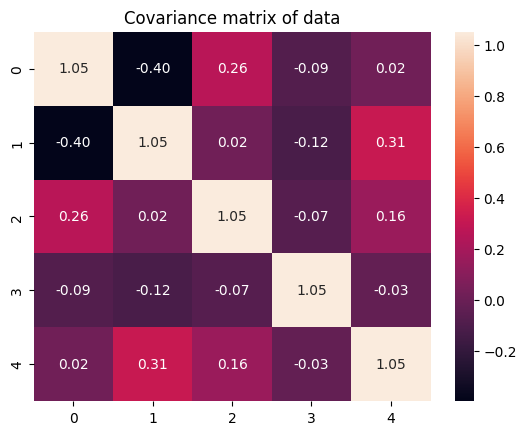

In [89]:
cov = caclulate_covariance(standardized)
cov

## Eigendecomposition 

Find eigenvector and eigenvalues which represent the principal components. The highest eigenvalue corresponds to the eigenvector indicates the direction of maximum variance, which is the best-fitting line through the dataset. 

In [83]:
def calculate_eigendecomposition(cov: np.ndarray) -> np.ndarray:
    assert isinstance(cov, np.ndarray), "Covariance matrix must be a numpy array"
    values, vectors = np.linalg.eig(cov)
    return values, vectors

In [90]:
eigenvalues, eigenvectors = calculate_eigendecomposition(cov)
eigenvalues, eigenvectors

(array([0.49828877, 1.56459026, 1.38687389, 0.78308331, 1.03032166]),
 array([[-0.60680175, -0.60221235,  0.38804444, -0.34388661,  0.01718809],
        [-0.67008472,  0.69282118,  0.18975144,  0.18086349, -0.04762429],
        [ 0.18390712, -0.16553276,  0.64008486,  0.6978908 ,  0.20498021],
        [-0.19287882, -0.05196701, -0.34541194,  0.08720401,  0.91278872],
        [ 0.33429634,  0.35670357,  0.53328966, -0.59529345,  0.34962318]]))

In [91]:
eigenvectors.shape

(5, 5)

In [92]:
eigenvalues.shape

(5,)

## Sort and Select Principal Components: 

In [94]:
sort_order = np.argsort(eigenvalues)[::-1] # Sort in descending order
sort_order # Generates an index of the sorted values

array([1, 2, 4, 3, 0])

In [96]:
s_eigenvalues = eigenvalues[sort_order]
# Use the order of the eigenvalue to get the corrsponding eigenvectors. 
s_eigenvectors = eigenvectors[:, sort_order]
s_eigenvalues, s_eigenvectors

(array([1.56459026, 1.38687389, 1.03032166, 0.78308331, 0.49828877]),
 array([[-0.60221235,  0.38804444,  0.01718809, -0.34388661, -0.60680175],
        [ 0.69282118,  0.18975144, -0.04762429,  0.18086349, -0.67008472],
        [-0.16553276,  0.64008486,  0.20498021,  0.6978908 ,  0.18390712],
        [-0.05196701, -0.34541194,  0.91278872,  0.08720401, -0.19287882],
        [ 0.35670357,  0.53328966,  0.34962318, -0.59529345,  0.33429634]]))

In [97]:
def sort_eigendecomposition(eigenvalues: np.ndarray, eigenvectors: np.ndarray) -> tuple:
    assert isinstance(eigenvalues, np.ndarray), "Eigenvalues must be a numpy array"
    assert isinstance(eigenvectors, np.ndarray), "Eigenvectors must be a numpy array"
    sort_order = np.argsort(eigenvalues)[::-1] # Sort in descending order
    s_eigenvalues = eigenvalues[sort_order]
    s_eigenvectors = eigenvectors[:, sort_order]
    return s_eigenvalues, s_eigenvectors

After finding the components, we can calculate how well each eigenvalue explains the information in the dataset. 

In [ ]:
eigenvalue_percentage = eigenvalues / np.sum(eigenvalues)
eigenvalue_percentage

array([0.09467487, 0.29727215, 0.26350604, 0.14878583, 0.19576112])

In [102]:
np.sum(eigenvalue_percentage)

np.float64(0.9999999999999999)

## Projection: 
Select a specific number of components and use that for the data. 
Projects the data into a new feature subspace. 

In [103]:
n = 2 # Number of components to keep
n_pca = s_eigenvectors[:, :n]

In [105]:
projected = standardized @ n_pca
projected

array([[ 0.58171999, -1.91117907],
       [ 0.58289564, -0.60950689],
       [ 0.26972974,  0.3430012 ],
       [ 1.60202791, -0.51383396],
       [-0.57499858, -1.03562805],
       [ 2.81002812,  0.71073221],
       [-2.76985765, -1.86513852],
       [ 0.49201618, -0.3584833 ],
       [ 0.09575819, -0.64342689],
       [-0.12506717, -0.35595283],
       [-1.00493099,  0.11342539],
       [-0.04211706,  1.16020348],
       [-0.55490541,  0.67389688],
       [-1.22032058,  1.79698253],
       [ 0.32435093, -0.76606099],
       [ 1.00859764, -0.06987082],
       [-0.77353566, -1.21175757],
       [-0.75506173,  2.64053917],
       [-1.5767181 ,  1.36062547],
       [ 1.63038858,  0.54143257]])

## Put it all together 

In [ ]:
def pca (data: np.ndarray, n: int) -> np.ndarray:
    assert isinstance(data, np.ndarray), "Data must be a numpy array"
    assert n > 0 and n <= data.shape[1], "n must be greater than 0 and less than the number of features"
    standardized = standardize(data)
    cov = caclulate_covariance(standardized)
    eigenvalues, eigenvectors = calculate_eigendecomposition(cov)
    s_eigenvalues, s_eigenvectors = sort_eigendecomposition(eigenvalues, eigenvectors)
    n_pca = s_eigenvectors[:, :n]
    projected = standardized @ n_pca
    return projected